> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::


# Algoritmos de Oráculo

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $



In [2]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

## Introducción

- La potencial de la computación cuántica reside en que podamos fabricar estados que concentran la solución a un problema en una o varias amplitudes. 


- El foco se desplaza enconces a encontrar los *problemas adecuados*

- Un clase importante de problemas consiste en  *desvelar* alguna propiedad de una cierta función binaria. La única opción válida para dicho propósito es consultar dicha función tantas veces como sea necesario. Por lo demás, se trata de una *caja negra*. Por esta razón, a dichas funciones se les denomina *oráculos*

*Ejemplo:* 

Denotaremos el conjunto $S_n =\{0,1,...2^n-1 \}\sim \{0,1\}^n$ indistintamente.



La implementación unitaria de una función binaria  $f:S_n \to S_1$ se realiza en la forma de un operador controlado

$$
{U_f} : \ket{x}_n\otimes \ket{y} \to \ket{x}_n\otimes \ket{y + f(x)}
$$

En particular, si $\ket{y} = \ket{-}$ tendremos el oráculo $f(x)$ codificado en la fase.

Vamos a estudiar el siguiente circuito



::::{figure} ./figuras/Busqueda_Oraculo.png
:width: 500px
:align: center
::::


Los ingredientes que nos ofrece la computación cuántica para tratar de obtener una ventaja computacional son :
    
- paralelismo ($\to $ evaluar el oráculo en **todos** los elementos de la base simultáneamente)

- codificación del oráculo en **la fase** (retroceso de fase)

- interferencia para **concentrar** la información en algunas amplitudes.


Vamos a evaluar el estado en la salida

\begin{eqnarray*}
\ket{\psi_0} &=& \ket{0}_n \otimes \ket{-} \nonumber\\
\rule{0mm}{15mm}
&\stackrel{W_{n}}{\longrightarrow} & \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{-} ~~~~\hbox{ paralelismo}  \nonumber \\
\rule{0mm}{12mm}
&\stackrel{U_f}{\longrightarrow} &  \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}\ket{x}\otimes (-1)^{f(x)} \ket{-} ~~~~ \hbox{ codificación del oráculo  en la fase}
\end{eqnarray*}

\begin{eqnarray*}
&\stackrel{W_{n}}{\longrightarrow} &   \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}(-1)^{f(x)}(H^{\otimes n}\ket{x})\otimes  \ket{-}   \nonumber\\
\rule{0mm}{12mm}
&=&   \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ x \cdot y}\ket{y}\otimes \ket{-}   ~~~~ \hbox{interferencia } 
\end{eqnarray*}

donde

$$x\cdot y = x_{n-1}y_{n-1} \oplus x_{n-2}y_{n-2} \oplus ...  \oplus x_{0}y_{0}$$ 


el resultado final es un estado factorizado. Por tanto podemos medir el primer factor de forma independiente y olvidarnos del segundo

$$
\ket{\Phi} =  \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ x \cdot y}\ket{y}
$$

dependiendo de cómo sea $f(x)$ podremos conseguir *interferencias* que  concentren la probabilidad en algún estado


##  El problema de Deutsch-Josza 

 

- **Promesa**: $f$ pertenece a una de las dos clases siguientes:  *constante* ($C \Rightarrow f(x)$ igual para todo $x$) o *equilibrada* ($E\Rightarrow f(x)$ igual para la mitad)




- **Problema**: descubrir si $f$ es de clase  $C$ ó $E$




::::::{admonition} Notar
:class: note

Clásicamente: deberíamos invocar el oráculos  $2^n/2+1$ veces. Esto es, por lo menos hasta la mitad de valores posibles de entrada, más uno.
::::::





-  **Solución**: corremos el circuito una vez y medimos sobre el estado $~\ket{\Phi}$ 





$\to ~$ si $f \in C$  es <b>constante</b>  $~\Rightarrow~ f(x) = f_0 ~\forall x ~~~\Rightarrow~~~$ la probabilidad de obtener $ \ket{0^n}~$ es  $ 1$  




*Prueba:*  

\begin{eqnarray*}
p_{0} &=& |\braket{0^n}{\Phi}|^2 \nonumber\\ \rule{0mm}{12mm}
&=& \left\vert \bra{0^n} \sum_{y=0}^{2^n-1}\left( \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f_0 + x \cdot y} \right)\ket{y} \right\vert^2
 \nonumber\\ \rule{0mm}{12mm}
 &=& \left\vert \frac{(-1)^{f_0}}{2^{n}}   \sum_{x=0}^{2^n-1} (-1)^{x \cdot 0}\right\vert^2    \\ \rule{0mm}{15mm}
 &=& (-1)^{2f_0} \\ \rule{0mm}{15mm} &=& 1 
\nonumber 
\end{eqnarray*}




$\to ~ $    si $f\in E$ es <b>equilibrada</b> $~\Rightarrow~$ la probabilidad de obtener $~\ket{0^n}~$  es $~0~$





En este caso  $f(x)=\pm 1$ está distribuida de forma equilibrada $~\Rightarrow$


\begin{eqnarray*}
\braket{0^n}{\Phi} &=& \bra{0^n} \sum_{y=0}^{2^n-1}\left( \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x) + x \cdot y} \right)\ket{y} \nonumber\\ \rule{0mm}{15mm}
 &=&  \frac{1}{2^{n}} \sum_{x=0}^{2^n-1} (-1)^{f(x) + x \cdot 0}    = 0
\nonumber \\
 &=&  \frac{1}{2^{n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)}    = 0
\end{eqnarray*}

al haber, por hipótesis, igual número de valores $f(x)=0$ que de $f(x)=1$ en la suma.






::::::{admonition} Ejercicio
:class: tip

    
Oráculos constantes sólo hay dos, $f(x)=0~$ ó $~f(x) = 1$ para todo $x$. Oráculos equilibrados hay muchos, y en la lección anterior deberías haber fabricado un circuito para generarlos. 
Construye el circuito de Deutsch-Josza y ponlo a prueba con estos oráculos. 
::::::


## El problema de Bernstein-Vazirani   



-  **Promesa**: $f$ es una *función lineal*, definida por una cadena de bits $a \in \{0,1\}^n$

$$f(x) = a\cdot x  = a_{n-1} x_{n-1} \oplus ....\oplus a_0 x_0$$


- **Problema**: hallar $a = a_{n-1} \ldots a_0$ 




::::::{admonition} Nota
:class: note

    
Clásicamente necesitaríamos invocar el oráculo   $n$ veces. 
Por ejemplo  $f(0\cdots 0 1)=0,1 $ revela $a_0=0,1$ respectivamente.
Iterativamente  $f(0\cdots 0 1 0)\to a_1$, $ f(0\cdots 1 0 0)\to a_2 \cdots$, etc.
::::::


**Solución**: correr el circuito una vez y medir el estado final

\begin{eqnarray}
\ket{\Phi} &=& \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ y \cdot x}\ket{y}
=  
\frac{1}{2^n}\sum_{y=0}^{2^n-1} \left(\sum_{x=0}^{2^n-1}(-1)^{(a+y)\cdot x}\right)\ket{y} ~\nonumber\\  \rule{0mm}{10mm}
&=&  
\frac{1}{2^n}\sum_{y=0}^{2^n-1} \left(\sum_{x=0}^{2^n-1}(-1)^{(-a+y)\cdot x}\right)\ket{y}\nonumber\\ \rule{0mm}{10mm}
 &=&  \frac{1}{2^n} \sum_{y=0}^{2^n-1} 2^n \delta_{(-a+y),0} \ket{y} \nonumber\\ \rule{0mm}{10mm}
&=& \rule{0mm}{5mm} \ket{a_0a_1\cdots a_{n-1}} \nonumber 
\end{eqnarray}

¡ Una **única**  medida del estado final da $a$ !



::::::{admonition} Notar
:class: note


En ambos casos, la <i>clave</i> está en <i>concentrar</i> la  probabilidad de la solución en la amplitud de un sólo estado.     
::::::


###  Implementación

En primer lugar generamos un oráculo lineal $f(x)=x\cdot a$ con una cadena $a=(a_{n-1},\ldots a_0)$ oculta de longitud $n$

In [44]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def random_linear_oracle(n):  #n es la longitud de la cadena a oculta

    import random, string
    a = ''.join(random.choices(['0','1'], k=n))
    print('cadena oculta=',a)  
    qc = QuantumCircuit(n+1) # el ultimo registro es la salida |f(x)> = |a.x>

    
    for i, ai in enumerate(reversed(a)):  # ponemos reversed para usar el convenio de qiskit
        if ai == '1':
            qc.cx(i,n)    
    return qc

random_linear_oracle(4).draw()
    

cadena oculta= 1011


q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼───────
       │    │       
q_3: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘

Ahora implementamos el oráculo en el algoritmo de BV 

In [45]:
def BV_circuit(linear_oracle,n):
    #n: número de bits
    #a: coeficiente oculto
    #return: circuito

    qreg = QuantumRegister(n+1)
    creg = ClassicalRegister(n)
    qc = QuantumCircuit(qreg,creg)

    #Hacemos máxima superposición
    qc.h(qreg)

    #Ponemos el último qubit en el estado |->
    qc.z(qreg[-1])

    qc.barrier()
    
    # añadimos el oráculo lineal con la cadena oculta
    qc.append(linear_oracle.to_gate(),qreg[:])
    
    qc.barrier()
    

    #Aplicamos Hadamard de nuevo

    qc.h(qreg[0:-1])

    qc.measure(qreg[0:-1],creg)

    return qc

vamos a correr un ejemplo concreto 

cadena oculta= 1000


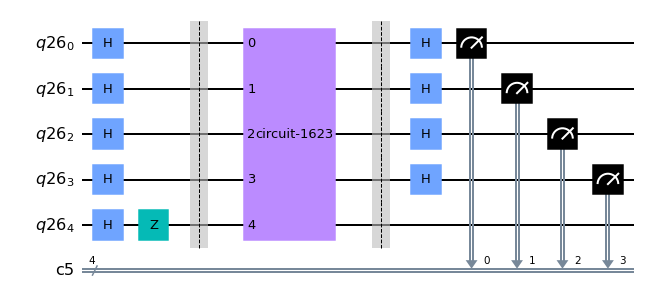

In [50]:
n = 4
linear_oracle = random_linear_oracle(n)

circuito = BV_circuit(linear_oracle,n)

circuito.draw(output = 'mpl')

ahora podemos extraer la cadena $a$ en *una sóla invocación* del oráculo

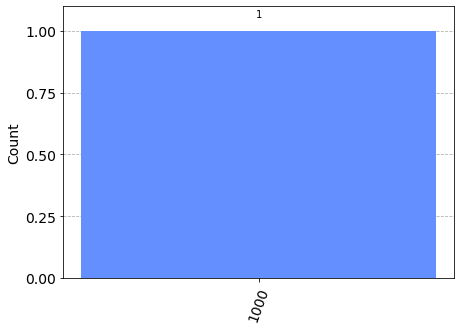

In [51]:
from qiskit import execute, Aer
simulator = Aer.get_backend('qasm_simulator')

job = execute(circuito,simulator,shots = 1)
cuentas = job.result().get_counts(circuito)

from qiskit.tools.visualization import plot_histogram
plot_histogram(cuentas) # Mostramos un histograma de resultados

::::::{admonition} Nota (¿Por qué funciona el algoritmo de Bernstein Vazirani?) 
:class: note



Supongamos que $a = 01011$ y que el oráculo que implementa la función lineal es 

  
    
::::{figure} ./figuras/BV_circuit.png
:width: 300px
:align: center
::::

    
Insertando dicho oráculo en el algoritmo de búsqueda, y 

    
-  recordando que $\ket{-} = H \ket{1}$ 

-  usando la equivalencia de circuitos 


es fácil reconocer que es equivalente al siguiente

::::{figure} ./figuras/Bernstein_Vazirani_trick.png
:width: 250px
:align: center
::::
    
::::::


Los anteriores algoritmos son *deterministas*. Vamos a ver un algoritmo que proporciona una ventaja exponencial pero de manera *probabilista*

## El problema de Simon  


Consideremos *ahora* una función $f:\{0,1\}^n \to \{0,1\}^n$ con la siguiente propiedad

-  **Promesa** : $f$ es *doblemente valuada y periódica* bajo suma *bit a bit*. 



es decir $~\Rightarrow ~$  existe un $~s\in \{0,1\}^n ~$ tal que $~~\forall x$

$$
 f(x) = f(x\oplus s) ~~~~~
$$

Ejemplo: 

$$
\begin{array}{cc|cc}
\hline x & f(x) & x & f(x) \\ \hline
0000&1111& 1000&0101\\
0001&1011& 1001&0100\\
0010&0011& 1010&0000\\
0011&1000& 1011&1110\\
0100&0101& 1100&1111\\
0101&0100& 1101&1011\\
0110&0000& 1110&0011\\
0111&1110& 1111&1000\\
\hline 
\end{array}
$$




-  **Problema**: hallar $s$ con el mínimo número de consultas al oráculo

::::::{admonition} Notar
:class: note


<i>Clásicamente</i> necesitaríamos inspeccionar ${\cal O}(n 2^n)$ términos
::::::


El circuito es *el mismo*, pero ahora involucra $n$ cúbits para codificar la *imagen* de $f$




::::{figure} ./figuras/SimonCircuit.png
:width: 500px
:align: center
::::


Notar la diferencia con los casos anteriores: 

-   ahora en la entrada de la ancilla ponemos $\ket{0}_n$ 
$\Rightarrow$ como consecuencia el oráculo aplica $f(x)$ de forma *booleana*


$$
U_f \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{0}  = \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{f(x)}
$$




-  después de aplicar e oráculo el estado está entrelazado! 

$\Rightarrow$ si hacemos una medida del segundo registro 
  el  n-cúbit en segundo registro colapsará a un cierto estado 
$~\ket{f(x_0)} $



- en virtud de la *promesa* $\ket{f(x_0)} = \ket{f(x_0\oplus s)}$, el primer registro colapsará a una *superposición de dos estados*  


$$
\ket{\psi} = \frac{1}{\sqrt{2}} \left( \rule{0mm}{4mm} \ket{x_0} + \ket{x_0 \oplus s} \right)
$$


$\rule{8mm}{0mm}$justo antes de la barrera


- siguiendo el circuito, aplicamos de nuevo la puerta de Walsh-Hadamard al primer registro 

\begin{eqnarray*}
H^{\otimes n} \frac{1}{\sqrt{2}} \left( \rule{0mm}{4mm} \ket{x_0} + \ket{x_0 \oplus s} \right) &=& \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1} \left[ (-1)^{x_0\cdot y} + (-1)^{(x_0\oplus s) \cdot y}\right]  \ket{y} \nonumber\\ \rule{0mm}{10mm}
&=& \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1} \left[ (-1)^{x_0\cdot y} + (-1)^{x_0 \cdot y}(-1)^{ s \cdot y}\right]  \ket{y} \nonumber\\ \rule{0mm}{10mm}
&=&  \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1}(-1)^{x_0\cdot y}  \left( \rule{0mm}{6mm} 1+ (-1)^{s \cdot y}\right) \ket{y}
\end{eqnarray*}


Observar  el factor 

$$
\frac{1}{2}\left( \rule{0mm}{3mm} 1+ (-1)^{s \cdot y}\right)~~ = ~~ 
\left\{\begin{array}{ccc} 0 &\hbox{if}&  s \cdot y\, (\hbox{mod 2}) = 1 \\ 1 &\hbox{if} & s\cdot y\, (\hbox{mod 2}) = 0\end{array}
\right.
$$ 

hace que **sólo tengan amplitud no nula** aquellos  $\ket{y}$ con $s\cdot y\,  (\hbox{mod 2})= 0$



Midiendo de forma repetida, el primer registro obtendremos una serie de n-bits $ y^{(a)} = y^{(1)},y^{(2)},...,y^{(n)}$ todos los cuales  verifican
un sistema homogéneo de $n$ ecuaciones lineales 



\begin{eqnarray*}
s\cdot y^{(1)} (\hbox{mod(2)})~=~ s_{n-1}y^{(1)}_{n-1} \oplus s_{n-2}y^{(1)}_{n-2} \oplus \ldots \oplus s_0 y^{(1)}_0  &~=~& 0 \nonumber\\ \rule{0mm}{8mm}
s\cdot y^{(2)} (\hbox{mod(2)}) ~=~ s_{n-1}y^{(2)}_{n-1} \oplus s_{n-2}y^{(2)}_{n-2} \oplus \ldots \oplus s_0 y^{(2)}_0 &~=~& 0 \nonumber\\
\vdots & & \nonumber\\ \rule{0mm}{10mm}
s\cdot y^{(n)} (\hbox{mod(2)}) ~=~ s_{n-1}y^{(p)}_{n-1} \oplus s_{n-2}y^{(n)}_{n-2} \oplus \ldots \oplus s_0 y^{(n)}_0 &~=~& 0 \nonumber\\
\end{eqnarray*}


donde todas las suma se entienden módulo dos.
Por un lado $s=s_{n-1}\ldots s_0$ son nuestras incógnitas y, por otro, $y^{(a)} = y^{(a)}_{n-1}\ldots y^{(a)}_0$ los coeficientes conocidos como resultado de las medidas

Dado que tenemos que averiguar los $n$ bits que conforman la solución $s$ necesitaremos, como mínimo, $n$ ecuaciones linealmente independientes



::::::{admonition} Nota
:class: note

    
    
1. No hay garantía de que las cadenas de bits $y$ obtenidos en las distintas evaluaciones del circuito sean diferentes siempre diferentes entre sí. 
Por tanto en general, para obtener un sistema lineal resoluble será necesario correr el circuito un número mayor de veces que $n$. 
    
Es por esta razón que el algoritmo de Simon es <i>probabilístico</i>
    
2.  La distribución de amplitudes que son nulas o no es independiente de $x_0$ y, por tanto, del resultado $\ket{f(x_0)}$ medido en el segundo registro. De modo que lo podemos obviar.    
::::::


Vamos a estudiar la misma función que hemos utilizado en la lección anterior para codificar un oráculo arbitrario dado por una tabla de verdad *f_outputs*

Esta función está en `macro_CURSO.py` donde se denomina `binary_function(f_outputs)`. 

La promesa es que dicha función contiene un sólo período. Vamos a tratar de encontrarlo.

In [20]:
# promesa: esta función contiene un periodo binario
f_outputs = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

# creamos el oráculo y lo transformamos en una puerta 
simon_oracle_gate = binary_function(f_outputs).to_gate()

# verificamos que se trata de una función de n en n bits
n_input = int(np.log2(len(f_outputs))) #número de outputs
m_output =len(f_outputs[0])            #longitud de cada output
assert(n_input == m_output)



::::::{admonition} Ejercicio
:class: tip

Completa la  construcción del algoritmo de Simon 

:::{dropdown} Solución
    
    # Aplica la puerta de Walsh-Hadamard al primer registro
    qc.h(qr_in)
    qc.barrier()
    
    # Aplicamos el oráculo
    qc.append(simon_oracle_gate,qr_in[:]+qr_out[:])    
    qc.barrier()
    
    # Medimos el registro de los cúbits de |f(x)>
    qc.measure(qr_out, cr)
    qc.barrier()


    # Volvemos a aplicar la puerta de Walsh-Hadamard al primer registro
    qc.h(qr_in)
    qc.barrier()
    
    # Finalmente medimos el registro de los inputs |x>

    qc.measure(qr_in, cr)
:::
::::::


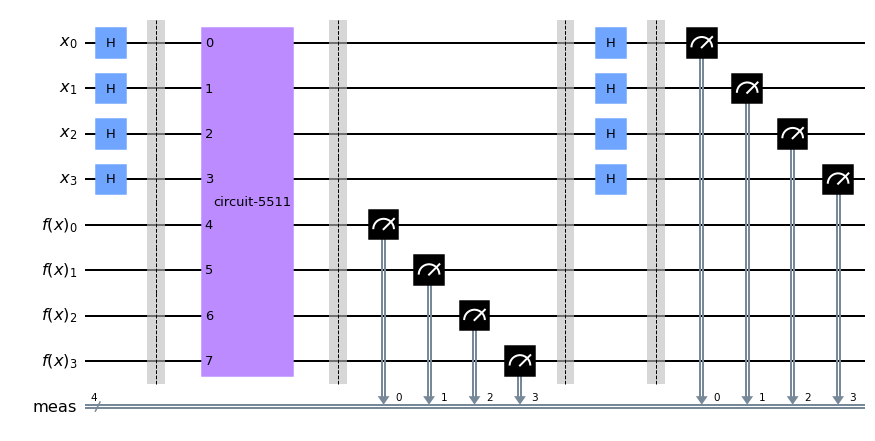

In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
n=n_input

qr_in = QuantumRegister(n, name='x')
qr_out = QuantumRegister(n, name='f(x)')
cr = ClassicalRegister(n, name='meas')
    
# Construimos el circuito
qc = QuantumCircuit(qr_in, qr_out, cr, name='q')
    
#========Escribe tu código aquí========
# Aplica la puerta de Walsh-Hadamard al primer registro
qc.h(qr_in)
qc.barrier()

# Aplicamos el oráculo
qc.append(simon_oracle_gate,qr_in[:]+qr_out[:])    
qc.barrier()

# Medimos el registro de los cúbits de |f(x)>  este paso se puede omitir, compruébalo 
qc.measure(qr_out, cr)
qc.barrier()


# Volvemos a aplicar la puerta de Walsh-Hadamard al primer registro
qc.h(qr_in)
qc.barrier()

# Finalmente medimos el registro de los inputs |x>

qc.measure(qr_in, cr)   

#======================================
    
qc.draw('mpl')


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
n=n_input

qr_in = QuantumRegister(n, name='x')
qr_out = QuantumRegister(n, name='f(x)')
cr = ClassicalRegister(n, name='meas')
    
# Construimos el circuito
qc = QuantumCircuit(qr_in, qr_out, cr, name='q')
    
#========Escribe tu código aquí========
    

#======================================
    
qc.draw('mpl')


## Comprobación

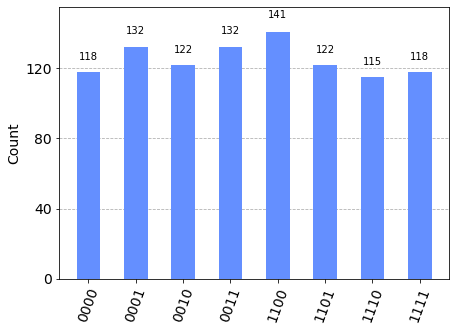

In [27]:
from qiskit import Aer, execute

shots_exe = 1000

backend = Aer.get_backend('qasm_simulator')
job     = execute(qc, backend, shots = shots_exe)
result  = job.result()
counts  = result.get_counts()

from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

In [28]:
def solve_for_solution(counts):

#   extraemos la longitud de las cuentas 'x' que será igual a la de la incógnita 's'
    n = len(list(counts)[0]) 

#   generamos todos los posibles inputs
    s_list = [format(i, 'b').zfill(n) for i in range(1, 2**n)]
#    s_list = [format(i, '0'+str(n)+'b') for i in range(1, 2**n)]  # otra manera de hacer lo mismo
    
#   ahora evaluamos, para cada s,  s.x_i = 0 con todos los x_i encontrados
    for s_str in s_list:
        s = [int(_) for _ in list(s_str)]
#        print(' s=',s)

#   sólo necesitamos n valores de x independientes'
        prod_sxi = [sum([s[j]*int(xi[j]) for j in range(len(s))])%2 for xi in list(counts)[:n]]

#   sólo si todos los s.x_i = 0 también la suma será = 0
        sum_sx = sum(prod_sxi)
        print('(Sum_{i=1}^4 s.x_i%2))=', sum_sx, ' para s=', s_str)
        if  sum_sx==0:
            return s_str
            break

Ejecutamos la parte clásica que sólo involucra ${\cal O}(n^2)$ operaciones

In [29]:
s_sol = solve_for_solution(counts)
print('la periodicidad buscada es =', s_sol)

(Sum_{i=1}^4 s.x_i%2))= 1  para s= 0001
(Sum_{i=1}^4 s.x_i%2))= 2  para s= 0010
(Sum_{i=1}^4 s.x_i%2))= 3  para s= 0011
(Sum_{i=1}^4 s.x_i%2))= 2  para s= 0100
(Sum_{i=1}^4 s.x_i%2))= 3  para s= 0101
(Sum_{i=1}^4 s.x_i%2))= 2  para s= 0110
(Sum_{i=1}^4 s.x_i%2))= 3  para s= 0111
(Sum_{i=1}^4 s.x_i%2))= 2  para s= 1000
(Sum_{i=1}^4 s.x_i%2))= 3  para s= 1001
(Sum_{i=1}^4 s.x_i%2))= 2  para s= 1010
(Sum_{i=1}^4 s.x_i%2))= 3  para s= 1011
(Sum_{i=1}^4 s.x_i%2))= 0  para s= 1100
la periodicidad buscada es = 1100


::::::{admonition} Ejercicio
:class: tip

Completa esta  función que toma como argumento una cadena de bits <i>s</i>, y  gener una tabla de verdad asociada a una función binaria $f:\{0,1\}^n\to\{0,1\}^n$ con exactamente la periodicidad $s$. Utiliza el algoritmo de Simon para recuperar dicha periodicidad. 


:::{dropdown} Solución
    old = [a for a in aux if sum_mod2(a, s) == inp][0]
    outputs.append(old)
:::

::::::


In [ ]:

def oraculo_de_Simon(s):   
    'autor Sergio Barrera'  

    def suma_bit_a_bit_mod2(a, b):    
        suma = ''
        for i in range(len(a)):
            suma += str((int(a[i]) + int(b[i])) % 2)
        return suma

    n = len(s) 
    inputs  = [format(i, 'b').zfill(n) for i in range(2**n)]
    aux = []
    outputs = []    
    for inp in inputs:
        if inp in [suma_bit_a_bit_mod2(a, s) for a in aux]:
###         
#        tu solución aquí 
##
        else:
            outputs.append(inp)
            aux.append(inp)
    return outputs

